# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

1. Подготовьте данные
1.1. Откройте файлы и изучите их.
Путь к файлам:
/datasets/gold_recovery_train.csv.
/datasets/gold_recovery_test.csv.
/datasets/gold_recovery_full.csv.
1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.
1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?
1.4. Проведите предобработку данных.
2. Проанализируйте данные
2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.
2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии.
3. Постройте модель
3.1. Напишите функцию для вычисления итоговой sMAPE.
3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.
Вам пригодятся формулы метрик качества:

<a id='intro'></a>

## Содержание


[Введение](#chapter0)

[Подготовка данных](#chapter1)

[Анализ данных](#chapter2)

[Построение модели](#chapter3)

[Общий вывод](#chapter4)


<a id='chapter0'></a>

# Введение


Компания "Цифры" разрабатывает решения для эффективной работы промышленных предприятий. Цель нашей работы - построить модель, которая должна предсказывать коэффициент восстановления золота из золотосодержащей руды. В качестве исходной информации нам даны файлы с параметрами добычи и очистки.


[К оглавлению](#intro)

<a id='chapter1'></a>

# Подготовка данных


На данном этапе наша задача - изучить исходные данные и подготовить их к анализу.


In [1]:
#загрузка необходимых библиотек
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:.2f}'.format

In [2]:
#загрузка исходных данных
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')

In [4]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [5]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,...,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,...,13.99,-505.50,11.95,-501.33,10.04,-500.17,7.98,-500.58,14.00,-599.79
2,2016-01-15 02:00:00,6.06,10.21,5.38,42.66,68.12,10.51,0.95,16.21,2.26,...,14.02,-502.52,11.91,-501.13,10.07,-500.13,8.01,-500.52,14.03,-601.43
3,2016-01-15 03:00:00,6.05,9.98,4.86,42.69,68.35,10.42,0.88,16.53,2.15,...,14.04,-500.86,12.00,-501.19,9.97,-499.20,7.98,-500.26,14.01,-600.00
4,2016-01-15 04:00:00,6.15,10.14,4.94,42.77,66.93,10.36,0.79,16.53,2.06,...,14.03,-499.84,11.95,-501.05,9.93,-501.69,7.89,-500.36,14.00,-601.50



В таблице содержится вся информация обо всех этапах добычи и очистки золотосодержащей руды. Столбцы именуются следующим образом:

[этап].[тип_параметра].[название_параметра]



Этап:

    * rougher - флотация
    
    * primary_cleaner - первичная очистка
    
    * secondary_cleaner - вторичная очистка
    
    * final - финальные характеристики



Типы параметров:

    * input - параметры сырья
    
    * output - параметры продукта
    
    * state - параметры, характеризующие текущее состояние этапа
    
    * calculation - расчетные характеристики



Первый столбец - это дата процесса.


In [6]:
#преобразование столбца в формат даты
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%dT%H:%M:%S')
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,...,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,...,13.99,-505.50,11.95,-501.33,10.04,-500.17,7.98,-500.58,14.00,-599.79
2,2016-01-15 02:00:00,6.06,10.21,5.38,42.66,68.12,10.51,0.95,16.21,2.26,...,14.02,-502.52,11.91,-501.13,10.07,-500.13,8.01,-500.52,14.03,-601.43
3,2016-01-15 03:00:00,6.05,9.98,4.86,42.69,68.35,10.42,0.88,16.53,2.15,...,14.04,-500.86,12.00,-501.19,9.97,-499.20,7.98,-500.26,14.01,-600.00
4,2016-01-15 04:00:00,6.15,10.14,4.94,42.77,66.93,10.36,0.79,16.53,2.06,...,14.03,-499.84,11.95,-501.05,9.93,-501.69,7.89,-500.36,14.00,-601.50



Этот датасет уже разбит на две выборки: обучающую и тестовую. В дальнейшем будем работать с ними.


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [8]:
#преобразование столбца в формат даты
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%dT%H:%M:%S')


Мы должны проверить, правильно ли рассчитывается эффективность обогащения <i> rougher.output.recovery </i>.


In [9]:
#создадим новый набор данных с отсутствующими нулевыми значениями столбцов, необходимых для расчета
clean_train = (
    data_train[(data_train['rougher.output.concentrate_au'].notna())
                     &(data_train['rougher.input.feed_au'].notna())
                     &(data_train['rougher.output.tail_au'].notna())
                     &(data_train['rougher.output.recovery'].notna())]
)
#параметры, участвующие в формуле
c = clean_train['rougher.output.concentrate_au']
f = clean_train['rougher.input.feed_au']
t = clean_train['rougher.output.tail_au']
#рассчитанная эффективность обогащения
clean_train['result'] = (c*(f-t))/(f*(c-t))*100
#вывод МАЕ
print(mean_absolute_error(clean_train['rougher.output.recovery'], clean_train['result']))

9.444891926100695e-15


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]



Значение МАЕ очень близко к 0, значит можем сделать вывод, что параметр эффективности обогащения рассчитан верно.



Теперь рассмотрим последний датасет - тестовую выборку.


In [10]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [11]:
#преобразование столбца в формат даты
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%dT%H:%M:%S')


Первое, что бросается в глаза - это гораздо меньшее количество столбцов, чем в обучающей выборке. Видим, что в тестовой выборке отсутствуют параметры, полученные уже в процессе очистки. Поскольку нам необходимо смоделировать коэффициент восстановление золота как раз, чтобы не запускать предприятия с убыточными характеристиками, то параметров, полученных уже в процессе производства, и не должно быть в качестве исходных. Таким образом, при построении модели в качестве признаков <i> features </i> будут использованы только те столбцы, которые присутствуют в тестовой выборке.



Сейчас мы проведем предобработку данных, проверим есть ли дубликаты в исходных данных и заполним пропущенные значения.


In [12]:
data_train.duplicated().sum()

0

In [13]:
data_test.duplicated().sum()

0


В поставленной задаче нам необходимо спрогнозировать два целевых признака: <i> rougher.output.recovery </i> и <i> final.output.recovery </i>. В случае, если в них есть пропуски, мы можем их заполнить по уже данной формуле.

Проверим пропуски в других столбцах.


In [14]:
columns_train = data_train.columns[(data_train.columns!='rougher.output.recovery')&(data_train.columns!='final.output.recovery')&(data_train.columns!='date')]

In [15]:
pd.options.display.max_rows = 100
data_train[columns_train].isna().sum()

final.output.concentrate_ag                             72
final.output.concentrate_pb                             72
final.output.concentrate_sol                           370
final.output.concentrate_au                             71
final.output.tail_ag                                    66
final.output.tail_pb                                   183
final.output.tail_sol                                  145
final.output.tail_au                                    66
primary_cleaner.input.sulfate                         1307
primary_cleaner.input.depressant                      1262
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         985
primary_cleaner.output.concentrate_ag                   82
primary_cleaner.output.concentrate_pb                  358
primary_cleaner.output.concentrate_sol                 636
primary_cleaner.output.concentrate_au                   82
primary_cleaner.output.tail_ag                          


Пропуски в этих столбцах мы можем заполнить.


In [16]:
data_train[columns_train] = data_train[columns_train].ffill(axis=1).astype('float64')
data_train[columns_train] = data_train[columns_train].bfill(axis=1).astype('float64')
data_train[columns_train].isna().sum()

final.output.concentrate_ag                           0
final.output.concentrate_pb                           0
final.output.concentrate_sol                          0
final.output.concentrate_au                           0
final.output.tail_ag                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
final.output.tail_au                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_sol                0
primary_cleaner.output.concentrate_au                 0
primary_cleaner.output.tail_ag                        0
primary_cleaner.output.tail_pb                  


Целевые признаки теперь мы можем заполнить по формуле выше.


In [17]:
data_train['rougher.output.recovery'].isna().sum()

2573

In [18]:
#параметры, участвующие в формуле
c = data_train['rougher.output.concentrate_au']
f = data_train['rougher.input.feed_au']
t = data_train['rougher.output.tail_au']
data_train['div'] = f*(c-t)

print(data_train[data_train['div']==0]['rougher.output.recovery'].isna().sum()/len(data_train))

0.07473309608540925



В случае, если знаменатель в формуле будет равен 0, мы не сможем посчитать его. Таких строк не очень много и мы можем их удалить, т.к. для модели важно, чтобы целевые признаки были без пропусков.


In [19]:
data_train = data_train.loc[data_train['div'] != 0]

data_train.loc[data_train['rougher.output.recovery'].isna(), 'rougher.output.recovery'] = (c*(f-t))/(data_train['div'])*100



Количество пропусков во втором целевом столбце - <i> final.output.recovery </i> - очень мало, их можно также удалить.


In [20]:
data_train = data_train.loc[data_train['final.output.recovery'].notna()]


Теперь мы должны обработать данные во втором датасете - в тестовой выборке. Здесь отсутствуют два целевых столбца, мы должны их подгрузить из общего датасета. Затем также проверим данные на дубликаты и пропуски.


In [21]:
#объединение двух таблиц - в тестовую выборку переносим целевые признаки из общей таблицы
data_test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date', how='left')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 55 columns):
date                                          5856 non-null datetime64[ns]
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
ro


В целевых признаках присутствуют пропуски, но их меньше 10%, поэтому можем удалить эти строки. В случае пропусков в других столбцах, можем заполнить их по аналогии с пропусками в таблице <i> data_train </i>.


In [22]:
data_test = data_test.loc[data_test['final.output.recovery'].notna()]
data_test = data_test.loc[data_test['rougher.output.recovery'].notna()]
columns_test = data_test.columns[(data_test.columns!='rougher.output.recovery')&(data_test.columns!='final.output.recovery')&(data_test.columns!='date')]
data_test[columns_test] = data_test[columns_test].ffill(axis=1).astype('float64')
data_test[columns_test] = data_test[columns_test].bfill(axis=1).astype('float64')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5855
Data columns (total 55 columns):
date                                          5290 non-null datetime64[ns]
primary_cleaner.input.sulfate                 5290 non-null float64
primary_cleaner.input.depressant              5290 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5290 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
ro

## Вывод


В первой части работы мы загрузили и изучили исходную информацию, провели предобработку данных и подготовили их к дальнейшему анализу. Сейчас в необходимых нам выборках нет дубликатов и пропусков, а также присутствуют все необходимые для построения модели признаки.


[К оглавлению](#intro)

<a id='chapter2'></a>

# Анализ данных


Посмотрим, как меняется концентрация металлов после разных ступеней очистки.


Text(0.5, 1.0, 'Распределение после флотации')

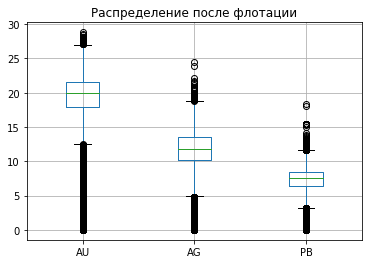

In [23]:
new_full = data_full
new_full = new_full.rename(columns={'rougher.output.concentrate_au' : 'AU', 'rougher.output.concentrate_ag' : 'AG', 'rougher.output.concentrate_pb' : 'PB'})
ax = new_full.boxplot(column=['AU', 'AG', 'PB'])
ax.set_title('Распределение после флотации')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Распределение после первой очистки')

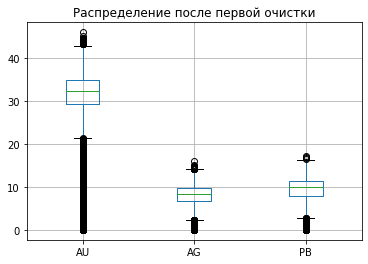

In [24]:
new_full = data_full
new_full = new_full.rename(columns={'primary_cleaner.output.concentrate_au' : 'AU', 'primary_cleaner.output.concentrate_ag' : 'AG', 'primary_cleaner.output.concentrate_pb' : 'PB'})
ax = new_full.boxplot(column=['AU', 'AG', 'PB'])
ax.set_title('Распределение после первой очистки')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Распределение после второй очистки')

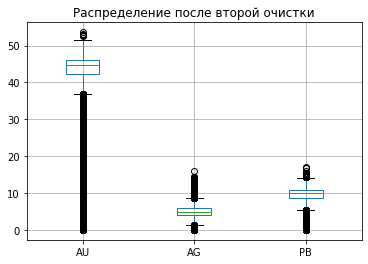

In [25]:
new_full = data_full
new_full = new_full.rename(columns={'final.output.concentrate_au' : 'AU', 'final.output.concentrate_ag' : 'AG', 'final.output.concentrate_pb' : 'PB'})
ax = new_full.boxplot(column=['AU', 'AG', 'PB'])
ax.set_title('Распределение после второй очистки')


На боксплотах видно, что на каждом этапе очистки концентрация золота растет.



Сейчас сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, то оценка модели будет неверной.


<function matplotlib.pyplot.show(*args, **kw)>

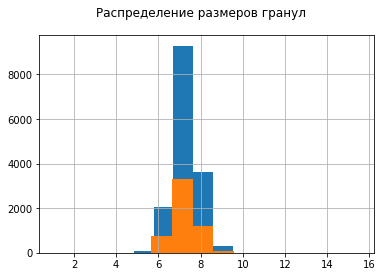

In [26]:
ax = data_train['primary_cleaner.input.feed_size'].hist()
ax2 = data_test['primary_cleaner.input.feed_size'].hist(ax=ax)
plt.suptitle('Распределение размеров гранул')
plt.show

In [27]:
data_train['primary_cleaner.input.feed_size'].describe()

count   15331.00
mean        7.31
std         0.61
min         1.08
25%         6.94
50%         7.28
75%         7.67
max        10.47
Name: primary_cleaner.input.feed_size, dtype: float64

In [28]:
data_test['primary_cleaner.input.feed_size'].describe()

count   5290.00
mean       7.27
std        0.61
min        5.65
25%        6.89
50%        7.25
75%        7.60
max       15.50
Name: primary_cleaner.input.feed_size, dtype: float64


Распределение размеров гранул в двух выборках примерно одинаковое, что по распределению на гистограмме, что по средним и медианным значениям.



Сейчас проанализируем концентрацию всех веществ на разных стадиях в обучающей и тестовой выборках.


In [29]:
data_train['rougher_input'] = (data_train['rougher.input.feed_au']+data_train['rougher.input.feed_ag']+
                               data_train['rougher.input.feed_pb']
)
data_train['prime_output'] = (data_train['primary_cleaner.output.concentrate_au']+
                               data_train['primary_cleaner.output.concentrate_ag']+
                               data_train['primary_cleaner.output.concentrate_pb']
)
data_train['rougher_output'] = (data_train['rougher.output.concentrate_au']+
                               data_train['rougher.output.concentrate_ag']+
                               data_train['rougher.output.concentrate_pb']
)
data_train['final_output'] = (data_train['final.output.concentrate_au']+
                               data_train['final.output.concentrate_ag']+
                               data_train['final.output.concentrate_pb']
)
data_train[['rougher_input', 'prime_output', 'rougher_output', 'final_output']].describe()

,rougher_input,prime_output,rougher_output,final_output
count,15331.00,15331.00,15331.00,15331.00
mean,19.72,48.68,37.60,57.63
std,5.43,11.28,9.82,11.03
min,0.03,0.00,0.00,0.00
25%,16.76,49.22,37.62,59.02
50%,19.19,51.61,39.76,60.18
75%,22.79,53.34,41.84,61.02
max,35.07,60.27,55.57,65.58



Видим аномалию - суммарная концентрация всех веществ не должна быть равна нулю. Возможно, это ошибка оборудования, либо эксперимент был проведен неверно. Такие значения нужно удалить из выборок.


In [30]:
data_train = data_train.loc[data_train['final_output']!=0]
data_train = data_train.loc[data_train['rougher_output']!=0]
data_train = data_train.loc[data_train['prime_output']!=0]
data_train = data_train.loc[data_train['rougher_input']!=0]


В тестовой выборке мы можем оценить только первоначальную концентрацию веществ.


In [31]:
data_test['rougher_input'] = (data_test['rougher.input.feed_au']+data_test['rougher.input.feed_ag']+
                               data_test['rougher.input.feed_pb']
)
data_test['rougher_input'].describe()

count   5290.00
mean      22.50
std        4.06
min        1.41
25%       19.82
50%       22.98
75%       25.11
max       33.50
Name: rougher_input, dtype: float64

In [32]:
data_test = data_test.drop(['rougher_input'], axis=1)

## Вывод


Мы проанализировали данные и закончили предобработку данных, чтобы приступить к следующему этапу - построению модели.


[К оглавлению](#intro)

<a id='chapter3'></a>

# Модель


В данной работе нам необходимо построить модель, предсказывающую два целевых признака: <i> rougher.output.recovery </i> и <i> final.output.recovery </i>. Эти параметры имеют тип данных float, а значит перед нами задача регрессии. Выделим среди данных целевые признаки.

У нас есть обучающая выборка и тестовая. Разделим обучающую выборку на две части: обучающую и валидационную. На обучающей выборке мы обучим модель, а на валидационной подберем параметры. Учтем при этом, что в тренировочной и валидационной выборке должны быть только те столбцы, какие есть в тестовой.


In [33]:
#объявление признаков
target_rougher = data_train['rougher.output.recovery']
target_final = data_train['final.output.recovery']
features = data_train[columns_test]

In [34]:
target_test_rougher = data_test['rougher.output.recovery']
target_test_final = data_test['final.output.recovery']
features_test = data_test[columns_test]


Также нам необходимо масштабировать признаки. Если в одном из них разбросы больше, чем в другом, то алгоритм решит, что тот признак важнее, а это не так: все признаки важны.


In [35]:
#масштабирование
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

In [36]:
#выделим обучающую и валидационную выборки для двух целевых признаков
features_train_rougher, features_valid_rougher, target_train_rougher, target_valid_rougher = (
train_test_split(features, target_rougher, test_size=0.25, random_state=0)
)
features_train_final, features_valid_final, target_train_final, target_valid_final = (
train_test_split(features, target_final, test_size=0.25, random_state=0)
)
print('Количество объектов в обучающей выборке:', len(features_train_rougher))
print('Количество объектов в валидационной выборке:', len(features_valid_rougher))

Количество объектов в обучающей выборке: 11136
Количество объектов в валидационной выборке: 3712



Для проверки качества модели нам потребуется особая метрика качества - функция sMAPE - симметричное среднее абсолютное процентное отклонение. Напишем функцию для ее нахождения.


In [37]:
def smape(target, predict):
    n = len(target)
    result = abs(target - predict)/((abs(target) + abs(predict))/2)
    return result.sum()/n*100

In [38]:
my_score = make_scorer(smape, greater_is_better=False)


В данный момент нам известны три алгоритма моделирования:

* линейная регрессия

* дерево решений

* случайный лес



Построим модель с минимальным значением функции sMAPE.


## Линейная регрессия

In [39]:
model_linear_rougher = LinearRegression()
model_linear_rougher.fit(features, target_rougher)
model_linear_final = LinearRegression()
model_linear_final.fit(features, target_final)
final_score_rougher = cross_val_score(model_linear_rougher, features, target_rougher, scoring=my_score, cv=5)
final_score_final = cross_val_score(model_linear_final, features, target_final, scoring=my_score, cv=5)
print(0.25*final_score_rougher+0.75*final_score_final)

[-32.79058164 -34.2116182  -49.24597094 -32.68637762 -46.77319058]


## Дерево решений

In [40]:
#зададим переменные для наилучших результатов
best_depth_tree = 0
best_result_tree = 1000
model_tree_rougher = None
model_tree_final = None
#в цикле перебираем значения глубины
for depth in range(1, 11):
    #задаем модели с текущей глубиной
    model_rougher = DecisionTreeRegressor(random_state=0, max_depth=depth)
    model_final = DecisionTreeRegressor(random_state=0, max_depth=depth)
    #обучаем модели
    model_rougher.fit(features_train_rougher, target_train_rougher)
    model_final.fit(features_train_final, target_train_final)
    #предсказываем результаты на валидационной выборке
    predict_rougher = model_rougher.predict(features_valid_rougher)
    predict_final = model_final.predict(features_valid_final)
    #рассчитываем меру
    result = 0.25*smape(target_valid_rougher, predict_rougher)+0.75*smape(target_valid_final, predict_final)
    #выбираем наилучший результат
    if result<best_result_tree:
        best_result_tree = result
        best_depth_tree = depth
        model_tree_rougher = model_rougher
        model_tree_final = model_final
print('Наилучшая мера:', best_result_tree, 'с глубиной', best_depth_tree)

Наилучшая мера: 7.518408387991368 с глубиной 10


## Случайный лес

In [41]:
#зададим переменные для наилучших результатов
best_depth_forest = 0
best_result_forest = 1000
best_est_forest = 0
model_forest_rougher = None
model_forest_final = None
#
for est in range(10, 51, 5):
    for depth in range(1, 11):
        #
        model_rougher = RandomForestRegressor(random_state=0, n_estimators=est, max_depth=depth)
        model_final = RandomForestRegressor(random_state=0, n_estimators=est, max_depth=depth)
        #обучаем модели
        model_rougher.fit(features_train_rougher, target_train_rougher)
        model_final.fit(features_train_final, target_train_final)
        #предсказываем результаты на валидационной выборке
        predict_rougher = model_rougher.predict(features_valid_rougher)
        predict_final = model_final.predict(features_valid_final)
        #рассчитываем меру
        result = 0.25*smape(target_valid_rougher, predict_rougher)+0.75*smape(target_valid_final, predict_final)
        #выбираем наилучший результат
        if result<best_result_forest:
            best_result_forest = result
            best_depth_forest = depth
            best_est_forest = est
            model_forest_rougher = model_rougher
            model_forest_final = model_final
print('Наилучшая мера:', best_result_forest, 'с глубиной', best_depth_forest, 'и количеством деревьев', best_est_forest)

Наилучшая мера: 7.065250502122303 с глубиной 10 и количеством деревьев 50


In [42]:
final_score_rougher = cross_val_score(model_forest_rougher, features_valid_rougher, target_valid_rougher, scoring=my_score, cv=5)
final_score_final = cross_val_score(model_forest_final, features_valid_final, target_valid_final, scoring=my_score, cv=5)
print(0.25*final_score_rougher+0.75*final_score_final)

[-7.88390015 -7.56563873 -7.28321178 -8.28570916 -8.06060808]



Итак, наилучший результат показал метод случайного леса с количеством деревьев 50 и глубиной 10. Проверим его на тестовой выборке.


<a id='correct0'></a>

In [43]:
features_test_scaled = scaler.transform(features_test)
predict_rougher = model_forest_rougher.predict(features_test_scaled)
predict_final = model_forest_final.predict(features_test_scaled)
result = 0.25*smape(target_test_rougher, predict_rougher)+0.75*smape(target_test_final, predict_final)
print('Результат на тестовой выборке:', result)

Результат на тестовой выборке: 9.628727091649285



Проверим какой результат даст сравнение со средним по выбрке.


In [44]:
median_rougher = pd.Series(target_train_rougher.median(), index=target_test_rougher.index)
median_final = pd.Series(target_train_final.median(), index=target_test_final.index)
result = 0.25*smape(target_test_rougher, median_rougher)+0.75*smape(target_test_final, median_final)
print('Результат на тестовой выборке:', result)

Результат на тестовой выборке: 9.281820651877297


[К оглавлению](#intro)

<a id='chapter4'></a>

# Общий вывод


В данной работе мы изучили промышленный процесс получения золота из руды для создания модели, позволяющей спрогнозировать эффуктивность восстановления золота, чтобы не запускать убыточные предприятия.

Изучив исходную информацию - концентрацию веществ на входе, размер зерен и прочее, - мы выделили два целевых признака, которые должна спрогнозировать наша модель, а также выделили столбцы, которые позволят обучить модель.

Мы построили три вида моделей:

* дерева решений с различными значениями глубины дерева

* случайного леса с варьирующимися значениями количества деревьев и глубины

* логистической регрессии

Для выбора наилучшего метода была построена особая метрика - функция sMAPE - симметричное среднее абсолютное процентное отклонение.

Согласно введенной метрике, лучшие результаты показал алгоритм случайного леса с 50 деревьями и глубиной 10. Именно на нем мы и проверили прогнозные результаты для тестовой выборки. Мы получили значение меры sMAPE равное 9.6, что является хорошим результатом, а значит мы можем использовать эту модель для прогноза эффективности восстановления золота из руды.


[К оглавлению](#intro)